# Imports

In [1]:
import matplotlib.pyplot as plt # For visualization

#To create and train the model
import torch
import torch.nn as nn

#For loading in the image data
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Setting the device we are going to use

In [2]:
device = torch.device("cuda")

# Loading in the data

In [3]:
dataset = datasets.ImageFolder(
    root="/kaggle/input/gender-classification-utk-face-dataset/Data", #Location of our data folder
    transform=transforms.ToTensor() #Converts the values in our data into a good format for machine learning
)

In [4]:
dataloader = DataLoader(dataset, batch_size=256, shuffle=True, num_workers=4, prefetch_factor=10) # Converts the data we loaded in into batches of 256 examples in each batch

# The Model

In [5]:
model = nn.Sequential(
    nn.Conv2d(3, 64, 3), # Maps important details on the images to create another set of 64 images called features
    nn.ReLU(), # removes negative parts and exentuates important parts of the features
    nn.AdaptiveAvgPool2d(1), # takes the average of each feature as a measure of how prevelant it is
    nn.Flatten(), # converts the averages into a suitable format for the linear layer
    nn.Linear( 64, 2 ), # takes all the features and converts them into two predictions for how likely it is a man or a woman
    nn.Softmax(dim=1) # Creates a probability distribution from the output of the linear
).to(device) #Puts our model on the gpu

# Training the Model

In [6]:
optim = torch.optim.Adam(model.parameters()) # The adam optimizer is a method to train our model
loss_fn = nn.CrossEntropyLoss() # A function to evaluate how well we did on a batch of images
loss_fn = loss_fn.to(device) # put the loss function on the gpu

In [7]:
train_loss = []
test_loss = []

In [8]:
from tqdm.notebook import tqdm

In [9]:
for _ in tqdm(range(1)): # repeat training several times
    
    epoch_loss = 0 # The cummulated loss over all the batches
    for images, labels in dataloader: # Loop over all batches and take out the images, labels
        images = images.to(device, non_blocking=True) # Put the images on the gpu
        labels = labels.to(device, non_blocking=True) # Put the labels on the gpu

        optim.zero_grad() #Reset the optimizer for the next step

        preds = model.forward(images) #Run the images through the model to produce a set of predictions
        loss = loss_fn(preds, labels) # Evaluate the model to see how well it did
        
        loss.backward() # Compute the loss in each layer of the model
        optim.step() # Optimize the model
        
        epoch_loss += loss.item() # add the loss of the current batch to the epoch_loss

    train_loss.append(epoch_loss/len(dataloader))

  0%|          | 0/1 [00:00<?, ?it/s]

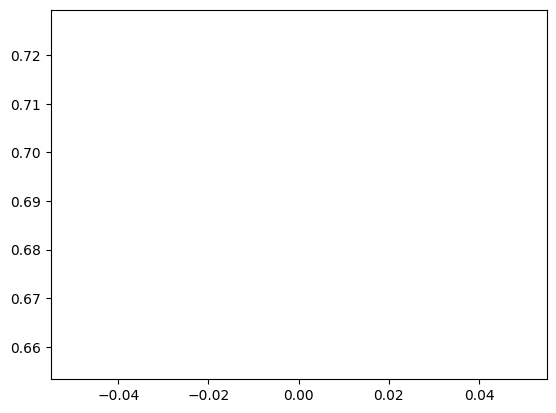

In [10]:
plt.plot(train_loss)